In [49]:
#必要なパッケージのインポート

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import reservoirpy as rpy

from scipy.integrate import solve_ivp
import pandas as pd
from reservoirpy.observables import nrmse, rsquare

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


rpy.verbosity(0)

from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy.datasets import mackey_glass

# just a little tweak to center the plots, nothing to worry about
from IPython.core.display import HTML
HTML("""
<style>
.img-center {
    display: block;
    margin-left: auto;
    margin-right: auto;
    }
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
""")

rpy.set_seed(42)

%time


CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 13.4 µs


In [50]:
shift_hours = range(-12, 13)
opt_shift_hour = 'random'

In [51]:
# val 

import pandas as pd
import os

dir_name_val = f"stddev/stddev_val_{opt_shift_hour}"
os.makedirs(dir_name_val, exist_ok=True)

results = []  # 結果を格納するためのリスト

for shift_hour in shift_hours:
    file_path = f'opt_{opt_shift_hour}_VDP_val/VDP_{shift_hour}.csv'

    data_df = pd.read_csv(file_path, names=['Column1', 'Column2', 'Column3'])

    # 各列の振幅と標準偏差を計算
    amplitudes = data_df.max() - data_df.min()
    std_dev_per_column = data_df.std()

    # 結果をリストに追加
    results.append({
        'shift_hour': shift_hour,
        'Amplitude_Column1': amplitudes['Column1'],
        'Amplitude_Column2': amplitudes['Column2'],
        'Amplitude_Column3': amplitudes['Column3'],
        'StdDev_Column1': std_dev_per_column['Column1'],
        'StdDev_Column2': std_dev_per_column['Column2'],
        'StdDev_Column3': std_dev_per_column['Column3']
    })

# 結果をデータフレームに変換
results_df = pd.DataFrame(results)

# 結果をCSVファイルとして保存
results_df.to_csv(f"{dir_name_val}/stddev_val.csv", index=False)

In [52]:
# gen

import pandas as pd
import os

dir_name_gen = f"stddev/stddev_gen_{opt_shift_hour}"
os.makedirs(dir_name_gen, exist_ok=True)

results = []  # 結果を格納するためのリスト

for shift_hour in shift_hours:
    file_path = f'opt_{opt_shift_hour}_VDP_gen/VDP_{shift_hour}.csv'
    
    data_df = pd.read_csv(file_path, names=['Column1', 'Column2', 'Column3'])

    # 各列の振幅と標準偏差を計算
    amplitudes = data_df.max() - data_df.min()
    std_dev_per_column = data_df.std()

    # 結果をリストに追加
    results.append({
        'shift_hour': shift_hour,
        'Amplitude_Column1': amplitudes['Column1'],
        'Amplitude_Column2': amplitudes['Column2'],
        'Amplitude_Column3': amplitudes['Column3'],
        'StdDev_Column1': std_dev_per_column['Column1'],
        'StdDev_Column2': std_dev_per_column['Column2'],
        'StdDev_Column3': std_dev_per_column['Column3']
    })

# 結果をデータフレームに変換
results_df = pd.DataFrame(results)

# 結果をCSVファイルとして保存
results_df.to_csv(f"{dir_name_gen}/stddev_gen.csv", index=False)

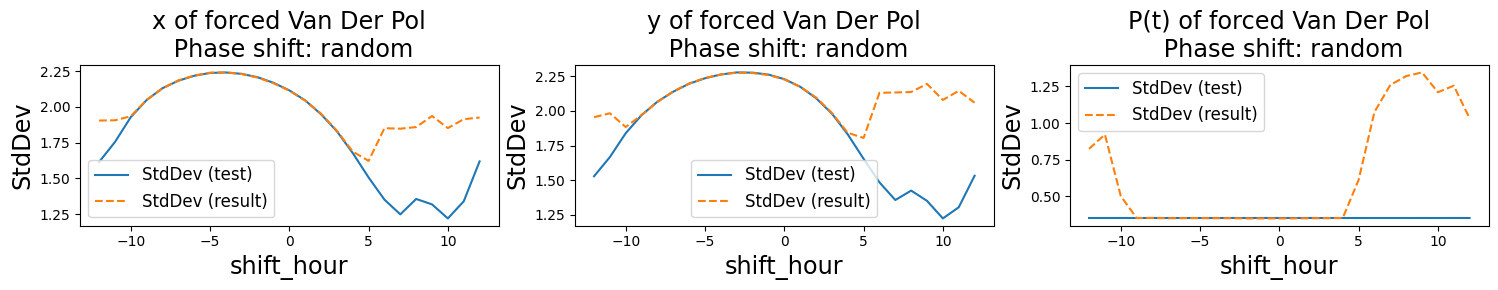

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import os

dir_name_plot = f"stddev/stddev_plot"
os.makedirs(dir_name_plot, exist_ok=True)

# CSVファイルのパス
file_path1 = f"{dir_name_val}/stddev_val.csv"  # ここを適切なファイルパスに変更
file_path2 = f"{dir_name_gen}/stddev_gen.csv"  # ここを適切なファイルパスに変更

# データの読み込み
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# 全体の図のサイズを設定
plt.figure(figsize=(15, 3))

# x of forced Van Der PolのAmplitudeとStdDevのグラフ



plt.subplot(1, 3, 1)
plt.plot(df1['shift_hour'], df1['StdDev_Column1'], label='StdDev (test)')
plt.plot(df2['shift_hour'], df2['StdDev_Column1'], label='StdDev (result)', linestyle='--')
plt.title(f'x of forced Van Der Pol\n Phase shift: {opt_shift_hour}', fontsize = 'xx-large')
plt.xlabel('shift_hour', fontsize = 'xx-large')
plt.ylabel('StdDev', fontsize = 'xx-large')
plt.legend(fontsize = 'large')

plt.subplot(1, 3, 2)
plt.plot(df1['shift_hour'], df1['StdDev_Column2'], label='StdDev (test)')
plt.plot(df2['shift_hour'], df2['StdDev_Column2'], label='StdDev (result)', linestyle='--')
plt.title(f'y of forced Van Der Pol\n Phase shift: {opt_shift_hour}', fontsize = 'xx-large')
plt.xlabel('shift_hour', fontsize = 'xx-large')
plt.ylabel('StdDev', fontsize = 'xx-large')
plt.legend(fontsize = 'large')


plt.subplot(1, 3, 3)
plt.plot(df1['shift_hour'], df1['StdDev_Column3'], label='StdDev (test)')
plt.plot(df2['shift_hour'], df2['StdDev_Column3'], label='StdDev (result)', linestyle='--')
plt.title(f'P(t) of forced Van Der Pol\n Phase shift: {opt_shift_hour}', fontsize = 'xx-large')
plt.xlabel('shift_hour', fontsize = 'xx-large')
plt.ylabel('StdDev', fontsize = 'xx-large')
plt.legend(fontsize = 'large')

plt.tight_layout()

# PDFファイルとして保存
plt.savefig(f"{dir_name_plot}/stddev_graph_{opt_shift_hour}.pdf")

plt.show()


In [54]:
%%%
import pandas as pd
import matplotlib.pyplot as plt


dir_name_plot = f"stddev/stddev_plot"
os.makedirs(dir_name_plot, exist_ok=True)


# CSVファイルのパス
file_path1 = f"{dir_name_val}/stddev_val.csv"  # ここを適切なファイルパスに変更
file_path2 = f"{dir_name_gen}/stddev_gen.csv"  # ここを適切なファイルパスに変更

# データの読み込み
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# 各列のAmplitudeとStdDevのグラフを並べて描画（横に3つ）
plt.figure(figsize=(15, 6))  # 全体の図のサイズを設定

for i in range(1, 4):
    # Amplitudeのグラフ
    plt.subplot(2, 3, i)
    plt.plot(df1['shift_hour'], df1[f'Amplitude_Column{i}'], label='Amplitude (test)')
    plt.plot(df2['shift_hour'], df2[f'Amplitude_Column{i}'], label='Amplitude (result)', linestyle='--')
    plt.title(f'Column {i}')
    plt.ylabel(f'Amplitude')
    plt.legend()

    # StdDevのグラフ
    plt.subplot(2, 3, i + 3)
    plt.plot(df1['shift_hour'], df1[f'StdDev_Column{i}'], label='StdDev (test)')
    plt.plot(df2['shift_hour'], df2[f'StdDev_Column{i}'], label='StdDev (result)', linestyle='--')
    plt.xlabel('shift_hour')
    plt.ylabel(f'StdDev')
    plt.legend()

plt.tight_layout()


plt.savefig(f"{dir_name_plot}/output_graph_{opt_shift_hour}.pdf")


plt.show()
%%%

UsageError: Cell magic `%%%` not found.
